The Four Asian Tigers refers to Hong Kong, Singapore, Korea, and Taiwan, four east Asian economy miracles that went through a rapid process of industrialization and maintained a high GDP growth rate from 1970s to 1990s. They took advantage of the peaceful world after World War II and flourished in the global relocation of labor-intensive industries, attracting a large amount of foreign capital and technology, taking advantage of low-cost labor force, and adjusting their economic development strategies in a timely manner. Could other developing countries perform same miracles again? What are the fundamental secrets that lead to the Tiger’s unprecedented growth? This analysis discusses the core drivers of economic growth and crossly reviews the key metrics of the four Tigers.

Data Preparation
The data is from the Penn World Database which covers numerous metrics of 183 countries. The data was downloaded from their website and pulled from the csv download into Jupyter labs. After this the data was cleaned and made usable to examine some of the key metrics that we believe are associated with a country’s development. The metrics includes Capital Stock per Capita, TFP(total factor productivity), Share of export, Human Capital, Capital services levels, Real consumption, Welfare-relevant TFP(Growth of welfare-relevant productivity over time in each country), Real internal rate of return, Price level of CCON(How consumption price levels differ across countries). The metrics we wanted to examine were compared with GDP per capita growth, which we believe to be the key metrics when determining a country's development. We did this with all four Asian tigers and each country individually to get a comprehensive picture of their development. These metrics allow us to answer why the Asian tigers have been able to become developed so quickly by comparing their development in each individual metric with the other countries. Through this comparison we will be able to not only figure out the different paths each country potentially takes to becoming developed, if there even are any differences, but also will allow us to examine which of the metrics are more important to the development of countries and show the correlations with GDP per capita.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.api import anova_lm


# select data from 1970 to 2000
df = pd.read_csv('pennworlddata.csv')
df = df.loc[df['countrycode'].isin(['KOR','HKG','TWN','SGP'])]
df.drop(columns = ['cor_exp','statcap','i_cig','i_xm','i_xr','i_outlier','i_irr'])
df = df.loc[(df['year']>= 1970 ) & (df['year']<= 2000 ) ]

#Calculate GDP per capita and capital stock per capita

df['gdppc'] = df['rgdpo']/df['pop']
df['cnpc'] = df['cn']/df['pop']


hkg = df.loc[df['countrycode'] == "HKG"]
kor = df.loc[df['countrycode'] == "KOR"]
twn = df.loc[df['countrycode'] == "TWN"]
sgp = df.loc[df['countrycode'] == "SGP"]

x = df[['cnpc','ctfp','csh_x','hc']]
y = df['gdppc']

x = sm.add_constant(x)
lrm = smf.ols(formula='gdppc ~ cnpc+csh_x+hc*ctfp',data=df).fit()
print(lrm.summary())

table1 = anova_lm(lrm)
print(table1)

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     894.7
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           5.21e-92
Time:                        18:22:06   Log-Likelihood:                -1097.1
No. Observations:                 124   AIC:                             2206.
Df Residuals:                     118   BIC:                             2223.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.048e+04   4621.882      2.267      0.0

1. According to the regression analysis above, it can be concluded that per capita gdp is positively correlated with Capital Stock per Captia, Share of export, and negatively correlated with Human Capital, TFP, and the value of R-squared is 0.974, indicating that the data fits the regression well.
2. According to the variance analysis above, it can be concluded that per capita gdp is closely related to Share of export, TFP, Capital services levels, and we can get the following expression:
GDPpercaptia = Bo + B1*TFP + B2*(TFPlevel) + B3*Export
Next we will try to find the correlation between the independent variable and the predictor

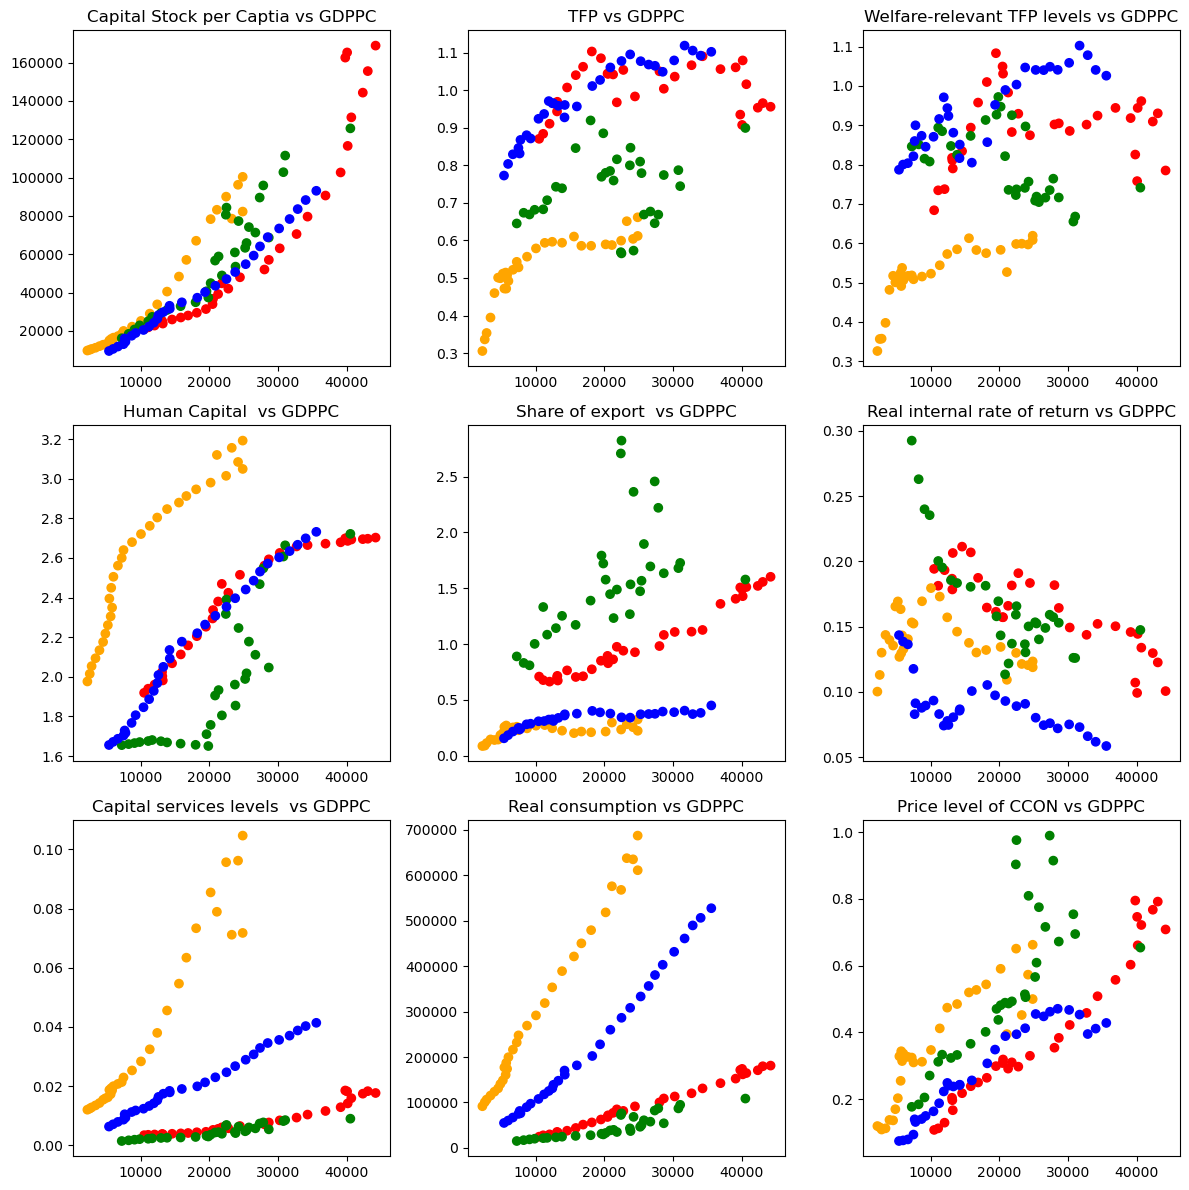

In [20]:
country = df
# Set the format of the scatterplots
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
# Red represents Hong Kong, green represents Singapore, blue represents Taiwan, and orange represents Korea
colors = {'HKG':'red','SGP':'green','TWN':'blue','KOR':'orange'}
# shows the relationship between Capital Stock per Capita and GDPPC
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
# shows the relationship between TFP and GDPPC
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
# shows the relationship between Share of export and GDPPC
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export  vs GDPPC")
# shows the relationship between Human Capital and GDPPC
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital  vs GDPPC")
# shows the relationship between Capital services and GDPPC
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels  vs GDPPC")
# shows the relationship between Real consumption and GDPPC
axs[2,1].scatter(country['gdppc'],country['rconna'],c=country['countrycode'].map(colors))
axs[2,1].set_title("Real consumption vs GDPPC")
# shows the relationship between Welfare-relevant TFP levels and GDPPC
axs[0,2].scatter(country['gdppc'],country['cwtfp'],c=country['countrycode'].map(colors))
axs[0,2].set_title("Welfare-relevant TFP levels vs GDPPC")
# shows the relationship between Real internal rate of return and GDPPC
axs[1,2].scatter(country['gdppc'],country['irr'],c=country['countrycode'].map(colors))
axs[1,2].set_title("Real internal rate of return vs GDPPC")
# shows the relationship between Price level of CCON and GDPPC
axs[2,2].scatter(country['gdppc'],country['pl_con'],c=country['countrycode'].map(colors))
axs[2,2].set_title("Price level of CCON vs GDPPC")

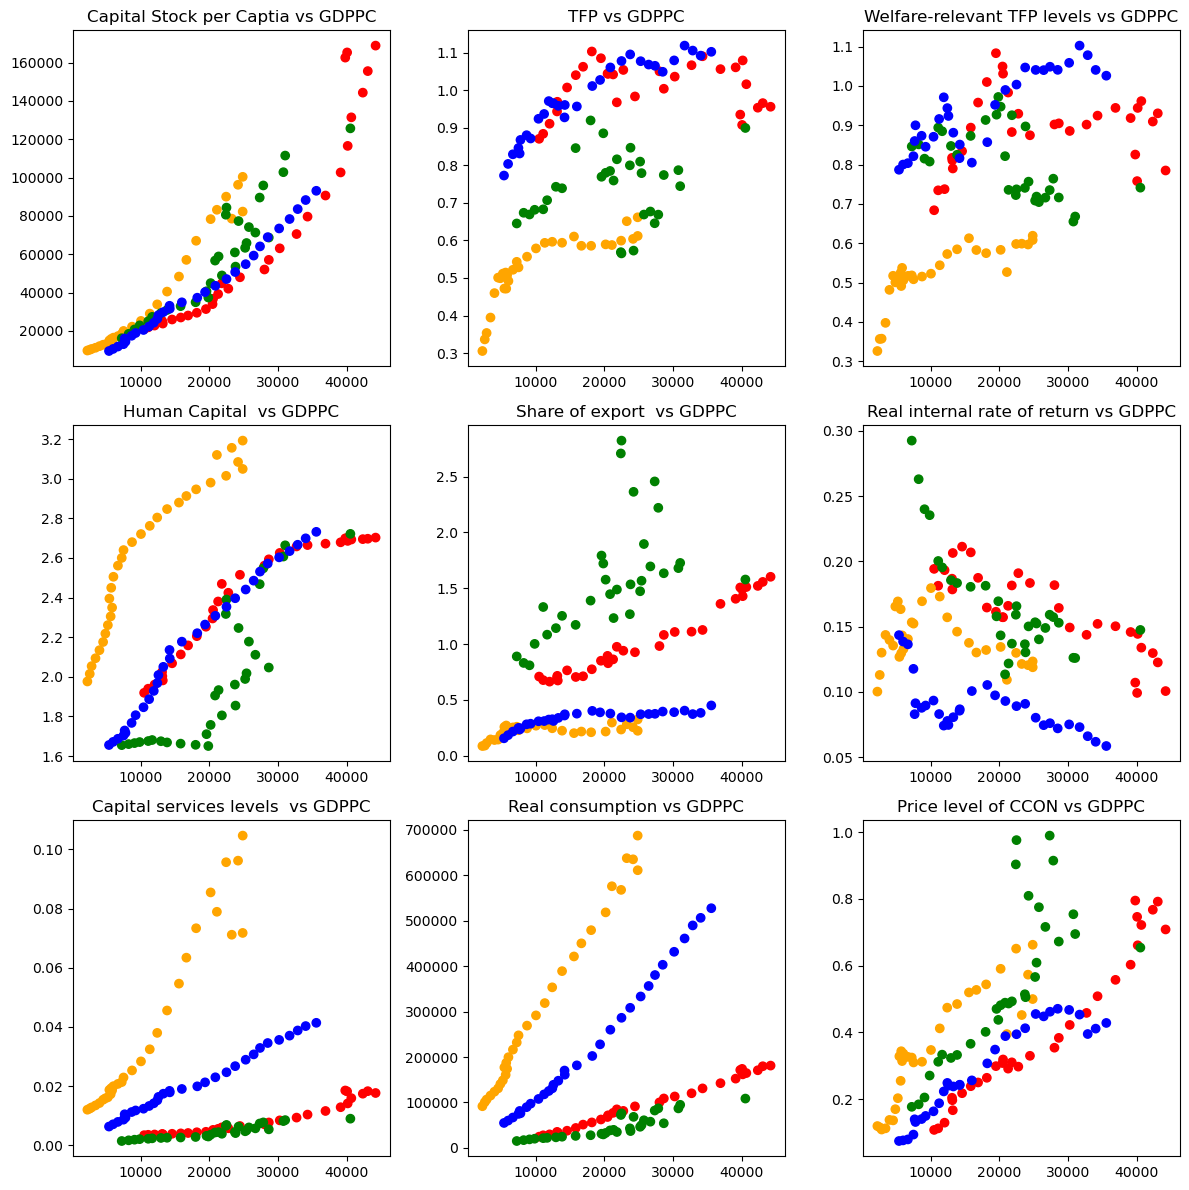

In [22]:
fig

The scatterplots above indicate the correlation between the independent variable (GDP per capita) and different predictors. Among those predictors, GDP per capita has obvious correlations with Capital Stock per Capita, Capital services levels, Real consumption, Price level of CCON, while it has no obvious correlations with TFP, Share of export, Human Capital, Welfare-relevant TFP levels, Real internal rate of return.

To find the similarities and differences between the four regions, we independently analyzed each country’s metrics.

Hong Kong

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1388.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.13e-29
Time:                        18:38:41   Log-Likelihood:                -254.54
No. Observations:                  31   AIC:                             517.1
Df Residuals:                      27   BIC:                             522.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.859e+04   1413.533    -13.155      0.0

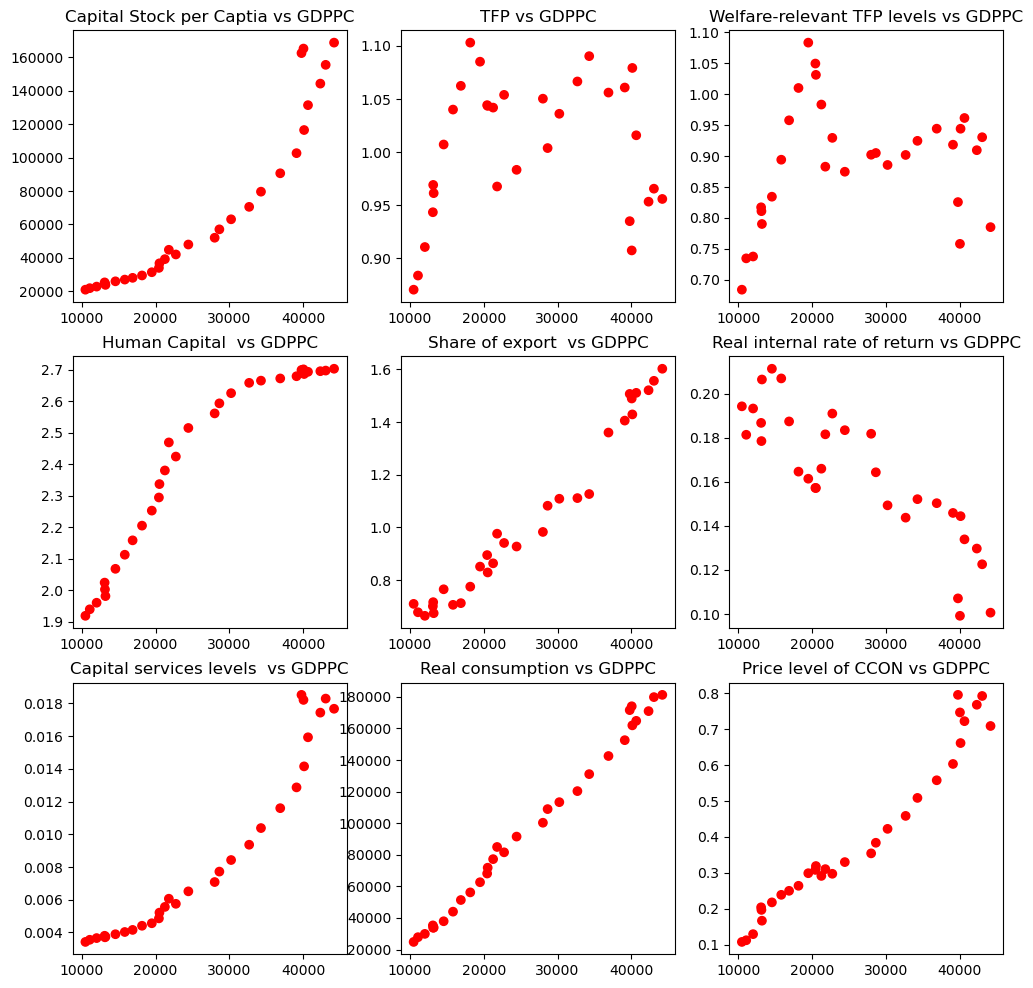

In [23]:
country = hkg
# Set the format of the scatterplots and show Hong Kong's data only
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export  vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital  vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels  vs GDPPC")
axs[2,1].scatter(country['gdppc'],country['rconna'],c=country['countrycode'].map(colors))
axs[2,1].set_title("Real consumption vs GDPPC")
axs[0,2].scatter(country['gdppc'],country['cwtfp'],c=country['countrycode'].map(colors))
axs[0,2].set_title("Welfare-relevant TFP levels vs GDPPC")
axs[1,2].scatter(country['gdppc'],country['irr'],c=country['countrycode'].map(colors))
axs[1,2].set_title("Real internal rate of return vs GDPPC")
axs[2,2].scatter(country['gdppc'],country['pl_con'],c=country['countrycode'].map(colors))
axs[2,2].set_title("Price level of CCON vs GDPPC")

# regression analysis
lrm = smf.ols(formula='gdppc ~ cnpc+csh_x+hc:ctfp',data=hkg).fit()
print(lrm.summary())

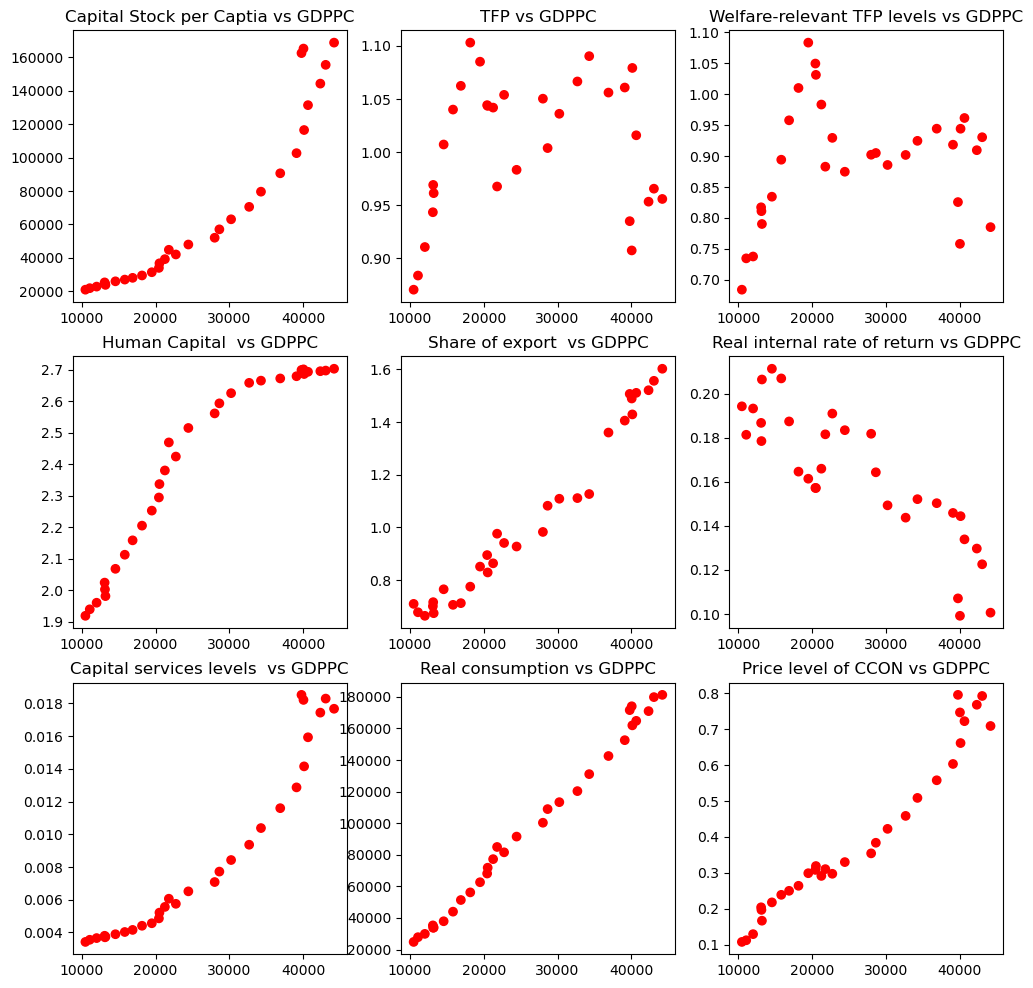

In [24]:
fig

From the regression analysis and scatterplot above, it can be concluded that the per capita GDP in Hong Kong shows a relatively obvious positive correlation with Capital Stock per Capita, Share of export, Human Capital, Capital services levels, Price level, and Real consumption. The graphs of capital stock and capital services almost mirror each other, providing a relationship which looks exponential for the time period covered (1970-2000). It is apparent that during this period, the capital stock and services contributes to the growth of GDP per capita at an decreasing rate. If this trend holds, there is only a limited amount of extra growth that Hong Kong can receive from improvement in these areas.  Over time as human capital has become more and more developed, it has taken less growth to achieve the same results, indicating the importance and payouts of investing in human capital early. At the same time, there is a relatively obvious negative correlation between per capita GDP and real internal rate of return, indicating a lower expectation of investment return in future.
The R-squared value in the regression analysis is 0.994, indicating that the fitting result is relatively accurate, and the correlation between the dependent variable and each predictor obtained by the regression analysis is basically consistent with the result obtained by the scatter plot.


Taiwan

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2783.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           8.35e-34
Time:                        18:39:35   Log-Likelihood:                -233.30
No. Observations:                  31   AIC:                             476.6
Df Residuals:                      26   BIC:                             483.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.968e+04   1639.634    -18.103      0.0

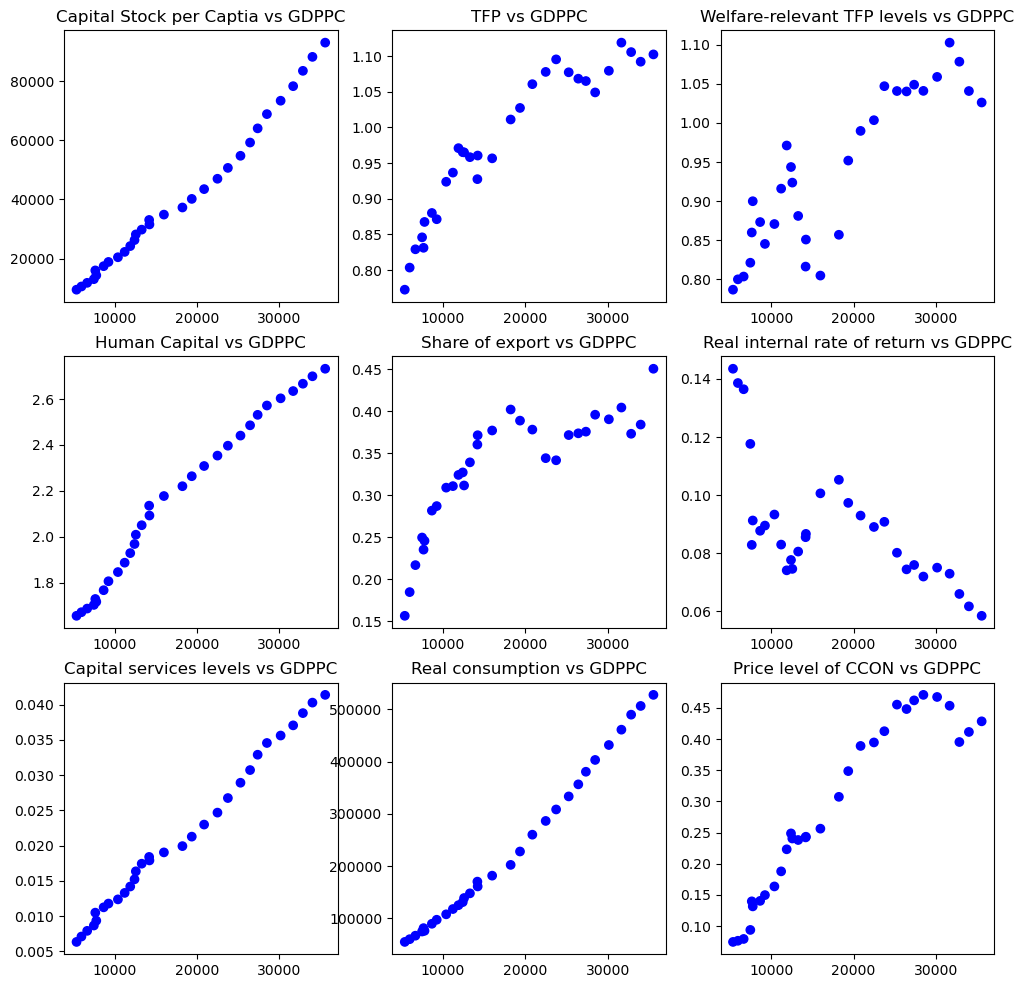

In [25]:
country = twn
# Set the format of the scatterplots and show Taiwan's data only
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs GDPPC")
axs[2,1].scatter(country['gdppc'],country['rconna'],c=country['countrycode'].map(colors))
axs[2,1].set_title("Real consumption vs GDPPC")
axs[0,2].scatter(country['gdppc'],country['cwtfp'],c=country['countrycode'].map(colors))
axs[0,2].set_title("Welfare-relevant TFP levels vs GDPPC")
axs[1,2].scatter(country['gdppc'],country['irr'],c=country['countrycode'].map(colors))
axs[1,2].set_title("Real internal rate of return vs GDPPC")
axs[2,2].scatter(country['gdppc'],country['pl_con'],c=country['countrycode'].map(colors))
axs[2,2].set_title("Price level of CCON vs GDPPC")

# regression analysis
lrm = smf.ols(formula='gdppc ~ cnpc:ck+csh_x+hc+ctfp',data=twn).fit()
print(lrm.summary())

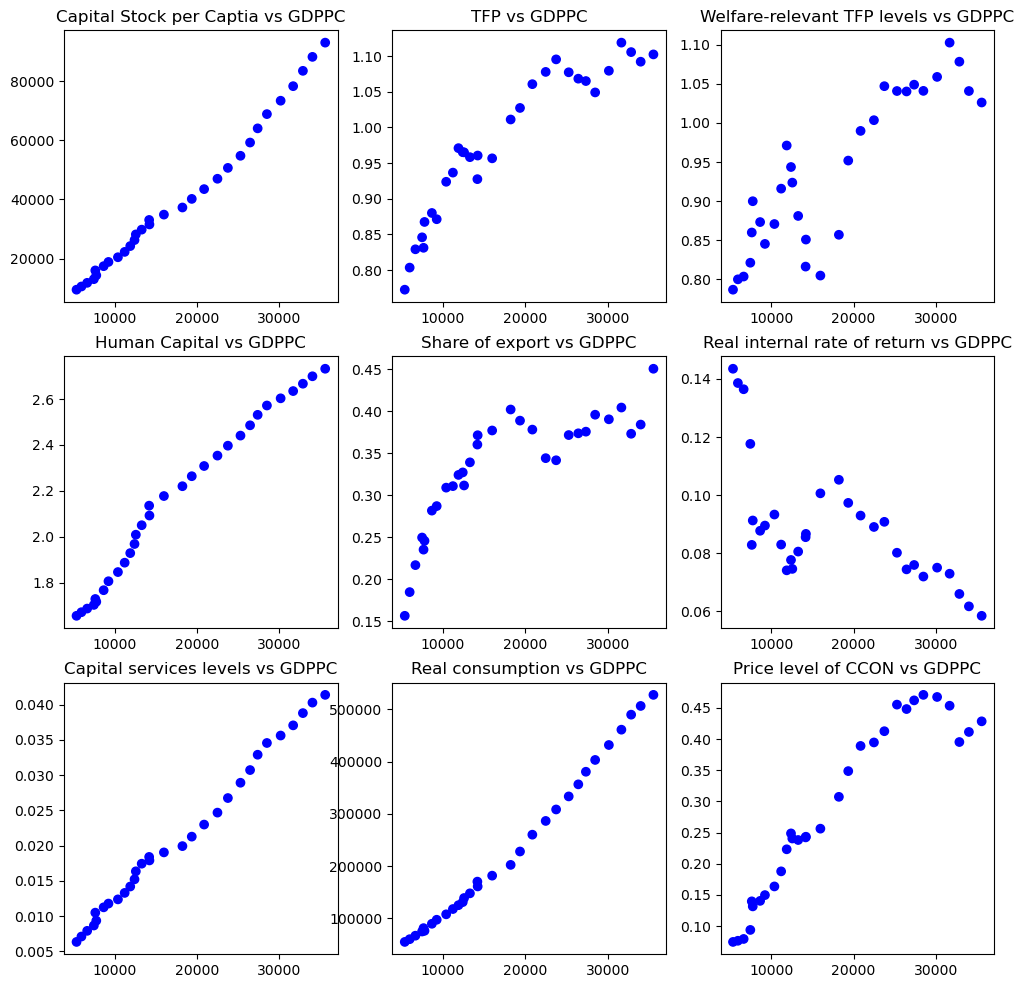

In [27]:
fig

From the regression analysis and scatterplot above, it can be concluded that there is a correlation between Taiwan's per capita GDP and  Capital Stock per capita, Share of export, Capital services levels, Real consumption. There is a relatively obvious positive correlation between the Price level of CCON, and with the rise of the Price level of CCON, the growth rate of GDP per capita begins to slow down. The correlation with TFP, Human Capital is weak. There is a relatively weak positive correlation between per capita GDP and Welfare-relevant TFP levels, and a relatively weak negative correlation with Real internal rate of return.
Compared with Hong Kong, Taiwan maintains a higher capital service levels and lower share of export throughout the periods.
The correlation between the dependent variable and each predictor obtained by the regression analysis is consistent with the results obtained by the scatter plot, and R-squared = 0.998 shows the accuracy of the fitting results.


Singapore

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     403.3
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.59e-22
Time:                        18:40:10   Log-Likelihood:                -261.86
No. Observations:                  31   AIC:                             531.7
Df Residuals:                      27   BIC:                             537.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.336e+04   7492.496      4.452      0.0

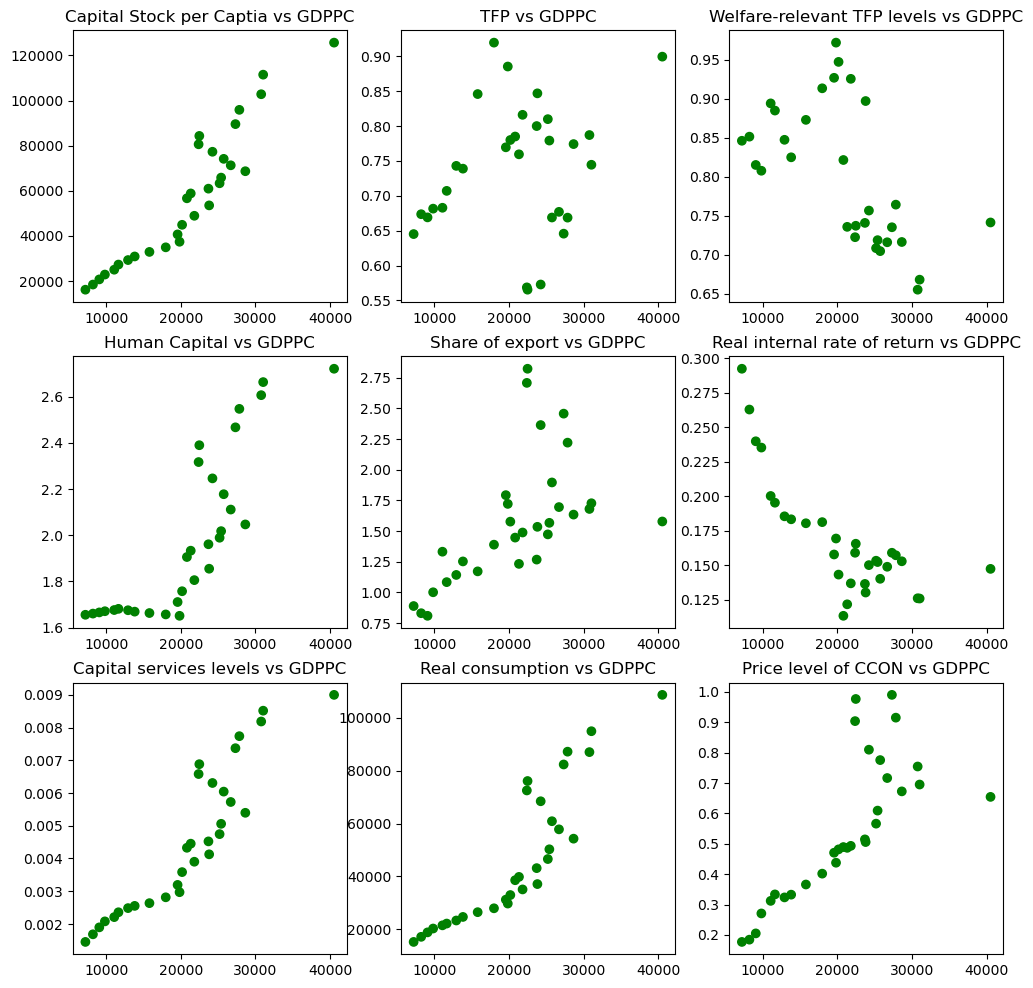

In [28]:
country = sgp
# Set the format of the scatterplots and show Singapore's data only
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs GDPPC")
axs[2,1].scatter(country['gdppc'],country['rconna'],c=country['countrycode'].map(colors))
axs[2,1].set_title("Real consumption vs GDPPC")
axs[0,2].scatter(country['gdppc'],country['cwtfp'],c=country['countrycode'].map(colors))
axs[0,2].set_title("Welfare-relevant TFP levels vs GDPPC")
axs[1,2].scatter(country['gdppc'],country['irr'],c=country['countrycode'].map(colors))
axs[1,2].set_title("Real internal rate of return vs GDPPC")
axs[2,2].scatter(country['gdppc'],country['pl_con'],c=country['countrycode'].map(colors))
axs[2,2].set_title("Price level of CCON vs GDPPC")

# regression analysis
lrm = smf.ols(formula='gdppc ~ cnpc+hc+ctfp',data=sgp).fit()
print(lrm.summary())

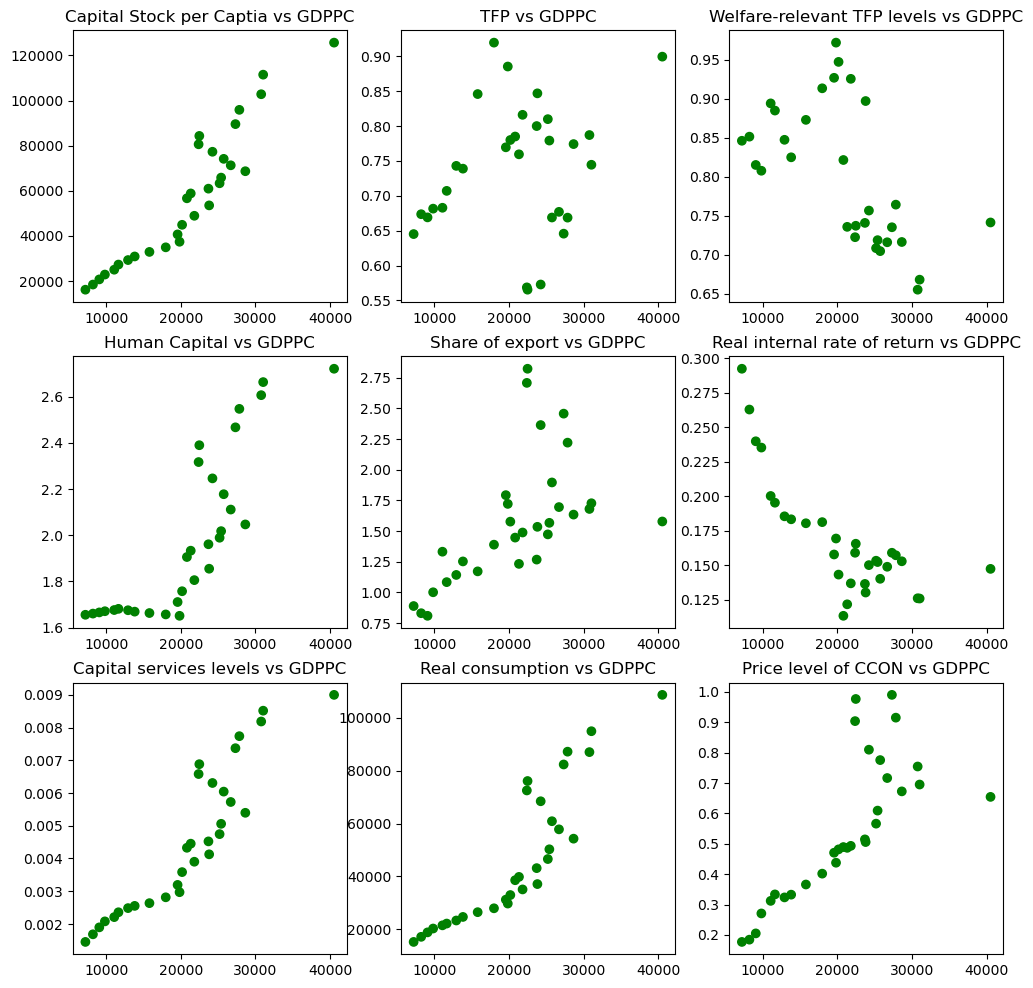

In [29]:
fig

Examining Singapore, the relationships here are quite different from Hong Kong and Taiwan, with each category not having any clear linear, exponential or logarithmic relationships. Singapore initially started on a similar track as Hong Kong and Taiwan but quickly stalled in their tracks, with an ending metrics that resembles Hong Kong. The total factor production and share of exports fluctuate significantly over time, notably with Singapore having a much larger export share than any other country in most time. From the scatter plot and regression analysis, it can be concluded that there is a certain correlation between Singapore's per capita GDP and Capital Stock per capita, Share of export, Capital services levels, Real consumption, and Price level of CCON, but it is not obvious and only reflects the overall correlation of trends. There is no correlation with other predictors.

On the other hand, the correlation between the dependent variable and each predictor obtained from the regression analysis is basically consistent with the results obtained from the scatter plot. R-squared = 0.978 also shows that the fitting effect is relatively general. Singapore’s predictors that are strongly correlated with per capita gdp may require further analysis.

Korea

                            OLS Regression Results                            
Dep. Variable:                  gdppc   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1409.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           5.64e-30
Time:                        18:40:29   Log-Likelihood:                -237.31
No. Observations:                  31   AIC:                             484.6
Df Residuals:                      26   BIC:                             491.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.02e+04   1385.708     -7.358      0.0

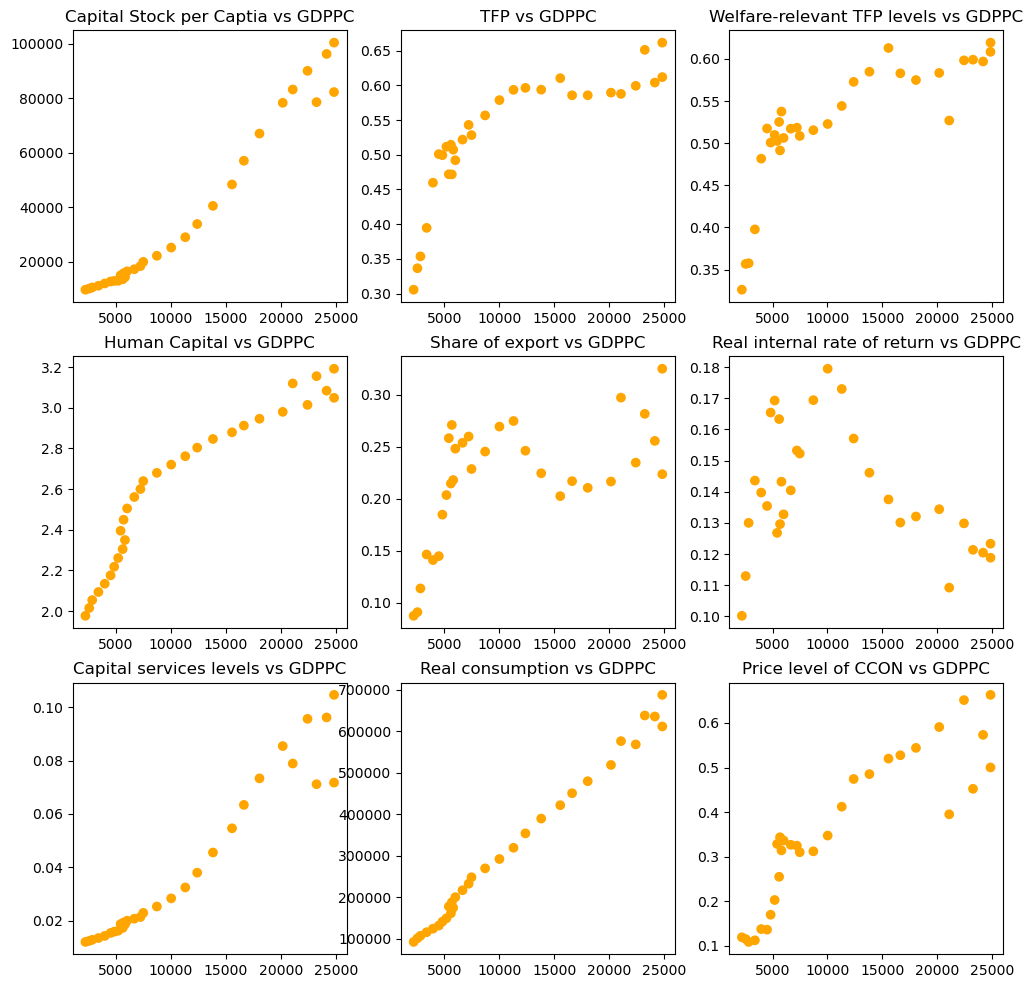

In [30]:
country = kor
# Set the format of the scatterplots and show Korea's data only
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
axs[0,0].scatter(country['gdppc'],country['cnpc'],c=country['countrycode'].map(colors))
axs[0,0].set_title("Capital Stock per Captia vs GDPPC")
axs[0,1].scatter(country['gdppc'],country['ctfp'],c=country['countrycode'].map(colors))
axs[0,1].set_title("TFP vs GDPPC")
axs[1,1].scatter(country['gdppc'],country['csh_x'],c=country['countrycode'].map(colors))
axs[1,1].set_title("Share of export vs GDPPC")
axs[1,0].scatter(country['gdppc'],country['hc'],c=country['countrycode'].map(colors))
axs[1,0].set_title("Human Capital vs GDPPC")
axs[2,0].scatter(country['gdppc'],country['ck'],c=country['countrycode'].map(colors))
axs[2,0].set_title("Capital services levels vs GDPPC")
axs[2,1].scatter(country['gdppc'],country['rconna'],c=country['countrycode'].map(colors))
axs[2,1].set_title("Real consumption vs GDPPC")
axs[0,2].scatter(country['gdppc'],country['cwtfp'],c=country['countrycode'].map(colors))
axs[0,2].set_title("Welfare-relevant TFP levels vs GDPPC")
axs[1,2].scatter(country['gdppc'],country['irr'],c=country['countrycode'].map(colors))
axs[1,2].set_title("Real internal rate of return vs GDPPC")
axs[2,2].scatter(country['gdppc'],country['pl_con'],c=country['countrycode'].map(colors))
axs[2,2].set_title("Price level of CCON vs GDPPC")

# regression analysis
lrm = smf.ols(formula='gdppc ~ cnpc+hc+ctfp+ck',data=kor).fit()
print(lrm.summary())

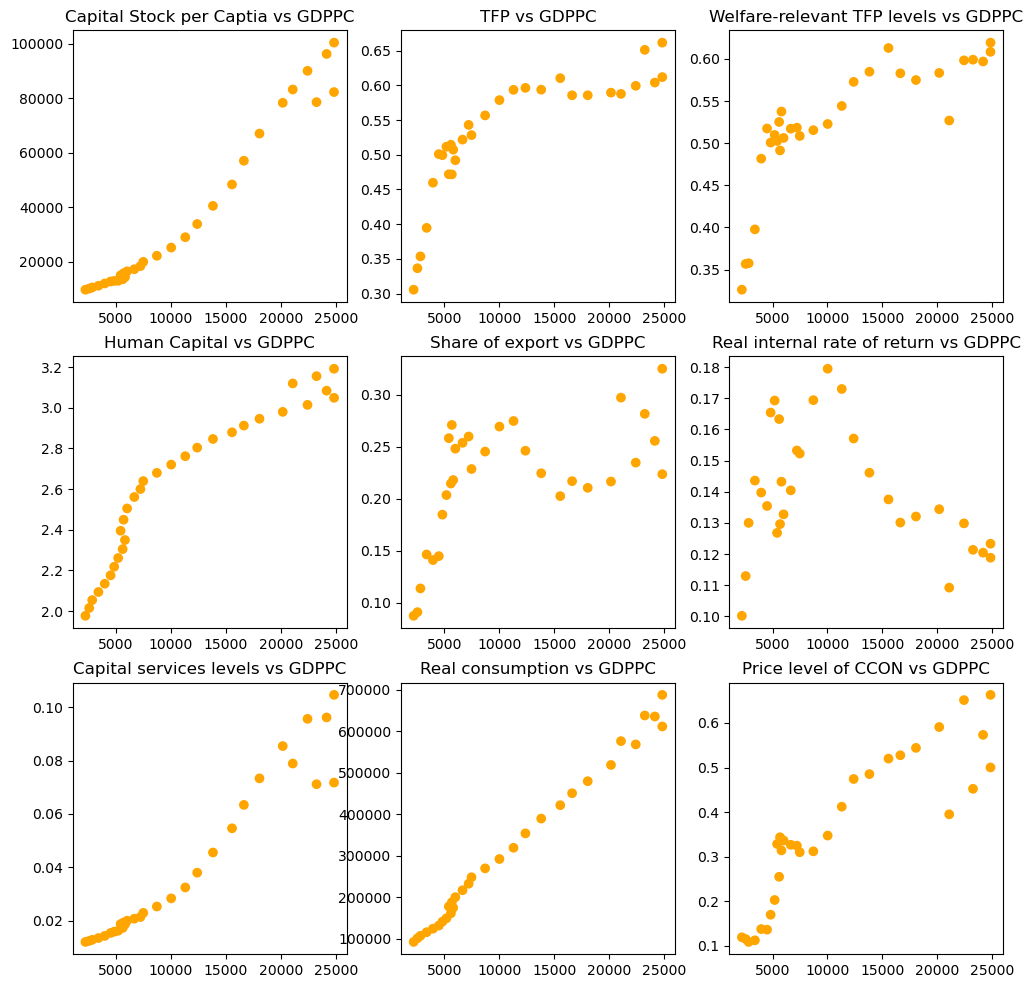

In [31]:
fig

From the scatter plot, it can be concluded that Korea’s per capita GDP has a relatively obvious correlation with Capital Stock per Capita, TFP, Share of export, Capital services levels, Real consumption, and Price level of CCON, while it’s worth noticing that there are certain noise data regarding the correlation with Price level of CCON and further analysis is needed to determine the relationship. It can be concluded from the regression analysis that the correlation between the dependent variable and each predictor is consistent with the results obtained from the scatter plot, and R-squared = 0.995 indicates that the fitting effect is relatively accurate.

To sum up,while each of the Asian tigers have become developed countries, their paths towards development are similar but yet different at the same time. Singapore seems to be the only real outlier in the development of almost all of the metrics examined here, and the only country to stall and even had its GDP per capita reduced during this period. While it had a very different growth path, by 2000, Singapore ahieved the second highest GDP per capita of the Asian tigers. When examining Hong Kong, the most successful one of the Asian tigers at this point, it is interesting to see how there is no clear dominance in any metric besides capital stock. However, it seems their performance in capital stock had a great relationship with GDP. The examination of Korea makes this rule more authentic as capital stock is one of the few categories in which they lag behind. It seems as though their advancement in human capital and capital services is severely lagged by capital stock.